In [1]:
import logging, sys, os, tqdm

# Main code is in ../models
SRC_DIR = os.path.abspath(os.path.join('..', 'models'))
if SRC_DIR not in sys.path:
    sys.path.append(SRC_DIR)

logging.basicConfig(level=logging.INFO)

from models import *

INFO:matplotlib.font_manager:generated new fontManager


In [2]:
def import_data(embedding):

    try:
        data = pd.read_csv(
            os.path.join(SRC_DIR, "embedding_data",  embedding + "test.csv")
            ,index_col=0
            )
        logging.info(f"Data loaded {embedding}")
        logging.debug(f"Dataset shape {data.shape}")
    except:

        logging.error("Error loading embedding data. Possible embedding types are: word2vec and tfidf")

    logging.info("Splitting data into train and test")
    X_train, Y_train, X_test, Y_test = split_train_test(data)

    return X_train, Y_train, X_test, Y_test

In [3]:
def fit_predict(model, X_train, Y_train, X_test, Y_test):

    methods = {
        'dummy': Dummy,
        'naivebayes': NaiveBayes,
        'onevsrest': One_VS_Rest_SVM,
        'onevsone': One_vs_One_SVM,
        'randomforest': RandomForest,
        'adaboost': AdaBoost,
    }

    if model in methods:
        eval_dict = methods[model](X_train, Y_train, X_test, Y_test)
    else:
        logging.error(f"{model} unknown. Potential models are: {lits(methods.keys())}")
        eval_dict = {}

    return eval_dict

INFO:root:
WORD2VEC

INFO:root:Data loaded word2vec
INFO:root:Splitting data into train and test
INFO:root:
--------------------



Training shape  (502, 301)
Test shape  (126, 301)
Training target distributions 
0    199
2    175
1    128
Name: classes, dtype: int64
Test target distributions 
2    46
0    45
1    35
Name: classes, dtype: int64


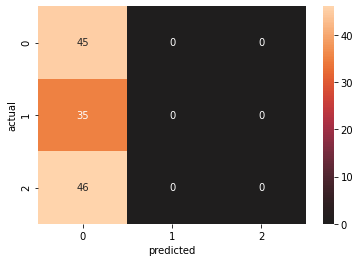

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
INFO:root:
--------------------



              precision    recall  f1-score   support

           0       0.36      1.00      0.53        45
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00        46

    accuracy                           0.36       126
   macro avg       0.12      0.33      0.18       126
weighted avg       0.13      0.36      0.19       126



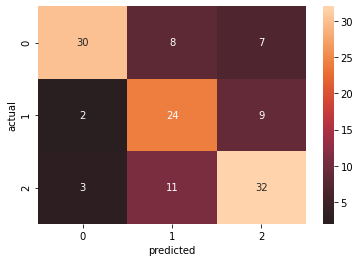

INFO:root:
--------------------



              precision    recall  f1-score   support

           0       0.86      0.67      0.75        45
           1       0.56      0.69      0.62        35
           2       0.67      0.70      0.68        46

    accuracy                           0.68       126
   macro avg       0.69      0.68      0.68       126
weighted avg       0.70      0.68      0.69       126


Tuned one vs rest svm (tuned) parameters: {'estimator__kernel': 'rbf', 'estimator__gamma': 7.244752025202521, 'estimator__C': 11.200000000000001}


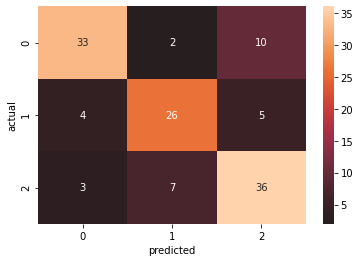

INFO:root:
--------------------



              precision    recall  f1-score   support

           0       0.82      0.73      0.78        45
           1       0.74      0.74      0.74        35
           2       0.71      0.78      0.74        46

    accuracy                           0.75       126
   macro avg       0.76      0.75      0.75       126
weighted avg       0.76      0.75      0.75       126



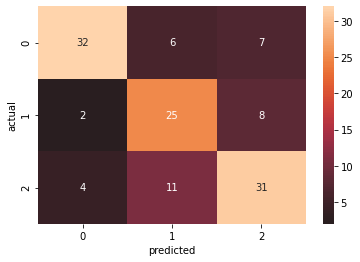

INFO:root:
--------------------



              precision    recall  f1-score   support

           0       0.84      0.71      0.77        45
           1       0.60      0.71      0.65        35
           2       0.67      0.67      0.67        46

    accuracy                           0.70       126
   macro avg       0.70      0.70      0.70       126
weighted avg       0.71      0.70      0.70       126



/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
%%time

embeddings = ['word2vec','tfidf','normbow']
models = ['dummy', 'naivebayes', 'onevsrest', 'onevsone', 'randomforest','adaboost']

eval_list = []
for embedding in embeddings:
    logging.info("\n{0}\n".format(embedding.upper()))
    X_train, Y_train, X_test, Y_test = import_data(embedding)
    logging.info("\n{0}\n".format(20 * "-"))
    for model in models:
        t0 = datetime.now()
        logging.debug("\n{0} ({1})\n".format(model.upper(), embedding.upper()))
        eval_dict = fit_predict(model, X_train, Y_train, X_test, Y_test)        
        t1 = datetime.now()
        eval_dict["Embedding"] = embedding
        eval_dict["Train & test duration (s)"] = (t1 - t0).total_seconds()
#         eval_dict["Train & test duration"] = "{0:.2f} seconds".format((t1 - t0).total_seconds())
        eval_list.append(eval_dict)
        logging.info("\n{0}\n".format(20 * "-"))
    logging.info("\n{0}\n".format(20 * "="))

In [ ]:
eval_df = pd.DataFrame(eval_list)
# eval_df.columns

eval_df[['Model', 'Embedding', 'Train & test duration (s)', 'Accuracy', 'Precision (class 0)',
       'Recall (class 0)', 'ROC AUC (ovr)', 'Cross-entropy loss']]\
    .style\
    .background_gradient(cmap='Greens', subset=['Accuracy', 'Precision (class 0)', 'Recall (class 0)', 'ROC AUC (ovr)'])\
    .background_gradient(cmap='Reds', subset=["Train & test duration (s)", "Cross-entropy loss"])